In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

In [2]:
data_path = os.path.join("..","..","data","clean_data","precios_sniim.parquet")

In [3]:
df_precios_sniim = pd.read_parquet(data_path)

In [4]:
df_precios_sniim.sample(10)

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
1531472,2021-09-14,Platano Chiapas,Caja de 20 kg.,Tabasco,Yucatán,Centro Mayorista Oxkutzcab,6.0,6.0,6.00
1688653,2023-06-07,Sandia Sangria,Kilogramo,Coahuila,Durango,Centro de Distribución y Abasto de Gómez Palacio,8.0,9.9,9.00
1154404,2022-04-26,Cebolla Morada,Kilogramo,Michoacán,Michoacán,Mercado de Abasto de Morelia,22.0,26.0,26.00
1149149,2023-01-05,Limon Sin Semilla,Arpilla de 25 kg.,Tabasco,Tabasco,Central de Abasto de Villahermosa,10.8,12.0,11.33
1914110,2023-08-02,Pera D´Anjou #100,Caja de 20 kg.,Importación,Coahuila,"Central de Abasto de La Laguna, Torreón",40.0,48.0,48.00
315568,2022-03-22,Chayote Sin Espinas,Kilogramo,Chiapas,Chiapas,Central de Abasto de Tuxtla Gutiérrez,6.0,8.0,6.00
1767906,2021-10-01,Nopal,Kilogramo,Nayarit,Nayarit,Nayarabastos de Tepic,23.0,25.0,24.00
210426,2023-05-11,Chile Guajillo,Kilogramo,Zacatecas,Jalisco,Mercado de Abasto de Guadalajara,110.0,115.0,110.00
1207249,2021-09-27,Chile De Arbol Fresco,Arpilla de 30 kg.,Veracruz,DF,Central de Abasto de Iztapalapa DF,60.0,70.0,63.00
1697148,2023-03-13,Chile Habanero,Kilogramo,Veracruz,Veracruz,Central de Abasto de Minatitlán,50.0,60.0,55.00


In [5]:
df_precios_sniim["año"] = df_precios_sniim["fecha"].dt.year
df_precios_sniim["mes"] = df_precios_sniim["fecha"].dt.month

In [6]:
def graficar_precios(cultivo):
    subset_df = df_precios_sniim[df_precios_sniim["producto"] == cultivo]
    
    fig,ax = plt.subplots()
    
    sns.lineplot(x="fecha",
                 y="precio_frec",
                 hue="año",
                 data=subset_df,
                 errorbar=None,
                 ax=ax,
                 palette="tab10")
    
    ax.title.set_text(f"Historial de precios para {cultivo}")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio por kg, MXN")
    ax.grid(axis='y')
    ax.tick_params(axis='x',rotation=90);
    
    fig.set_size_inches(16,9)
    
    return

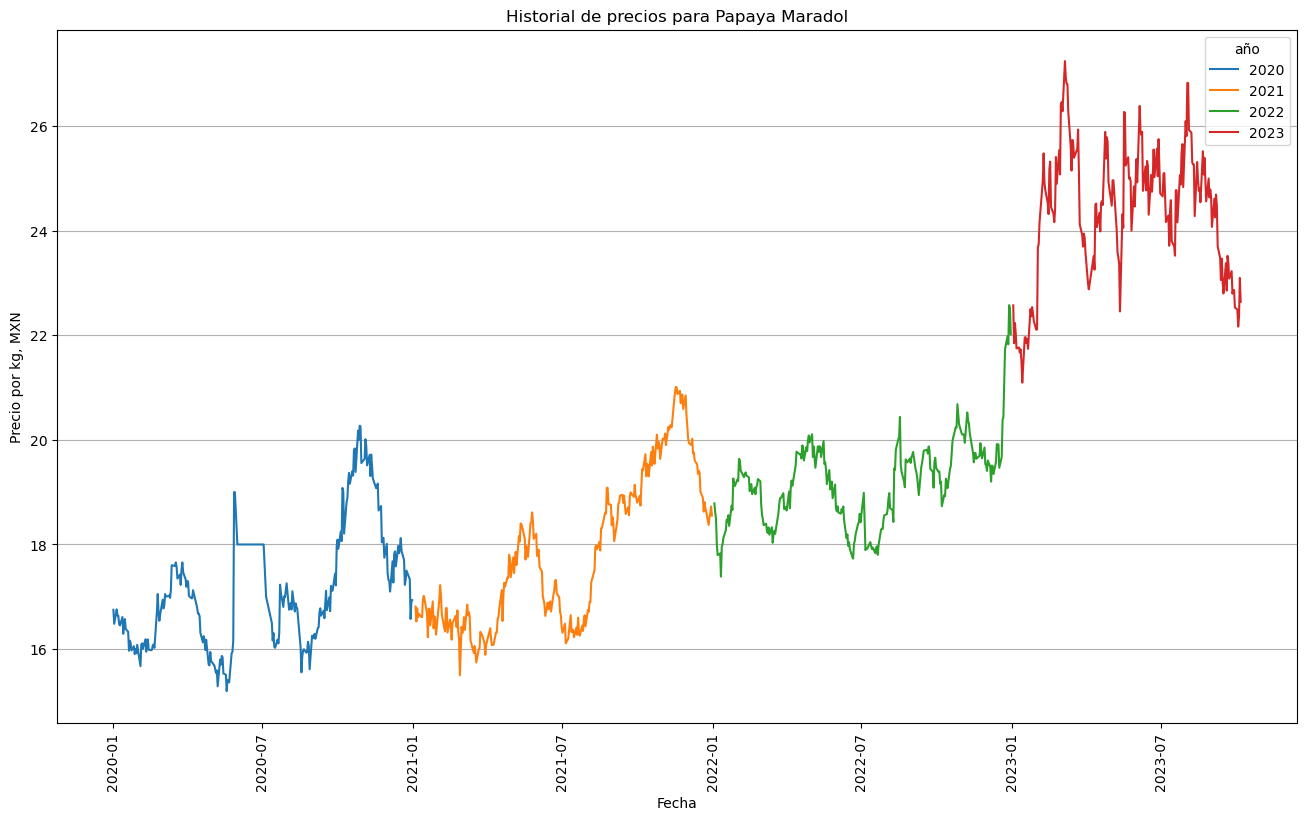

In [7]:
graficar_precios("Papaya Maradol")

In [8]:
lista_productos = sorted(list(df_precios_sniim["producto"].unique()))
lista_productos[:5]

['Acelga',
 'Aguacate Criollo',
 'Aguacate Hass',
 'Aguacate Hass Adelantado',
 'Aguacate Pagua']

In [9]:
dd = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Seleccione un producto")

widgets.interact(graficar_precios,cultivo=dd)

interactive(children=(Dropdown(description='Seleccione un producto', options=('Acelga', 'Aguacate Criollo', 'A…

<function __main__.graficar_precios(cultivo)>